# importing different library for creating model



In [148]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as pli
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Loading Data and Explanation of Features

In [149]:
data = pd.read_csv("/content/Car_Price_Prediction Dataset.csv")
data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [150]:
data.describe()    #describing the features which contain the integer and float type values

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [151]:
data.info() #giving the information about the dataset like the datatype , number of non null values of features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [152]:
data.isnull().sum() # getting the sum of number of null values of all feature of dataset

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [153]:
data.count() # counting the non null values of dataset

Unnamed: 0           6019
Name                 6019
Location             6019
Year                 6019
Kilometers_Driven    6019
Fuel_Type            6019
Transmission         6019
Owner_Type           6019
Mileage              6017
Engine               5983
Power                5983
Seats                5977
New_Price             824
Price                6019
dtype: int64

# pre processing

In [154]:
data.head(10)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [155]:
data.tail(10)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6009,6009,Toyota Camry Hybrid,Mumbai,2015,33500,Petrol,Automatic,First,19.16 kmpl,2494 CC,158.2 bhp,5.0,NaN,19.75
6010,6010,Honda Brio 1.2 VX MT,Delhi,2013,33746,Petrol,Manual,First,18.5 kmpl,1198 CC,86.8 bhp,5.0,6.63 Lakh,3.20
6011,6011,Skoda Superb 3.6 V6 FSI,Hyderabad,2009,53000,Petrol,Automatic,First,0.0 kmpl,3597 CC,262.6 bhp,5.0,NaN,4.75
6012,6012,Toyota Innova 2.5 V Diesel 7-seater,Coimbatore,2011,45004,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,7.0,NaN,9.48
6013,6013,Honda Amaze VX i-DTEC,Coimbatore,2015,70602,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,NaN,4.83
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [156]:
data.shape # giving the number of rows , columns of the dataset

(6019, 14)

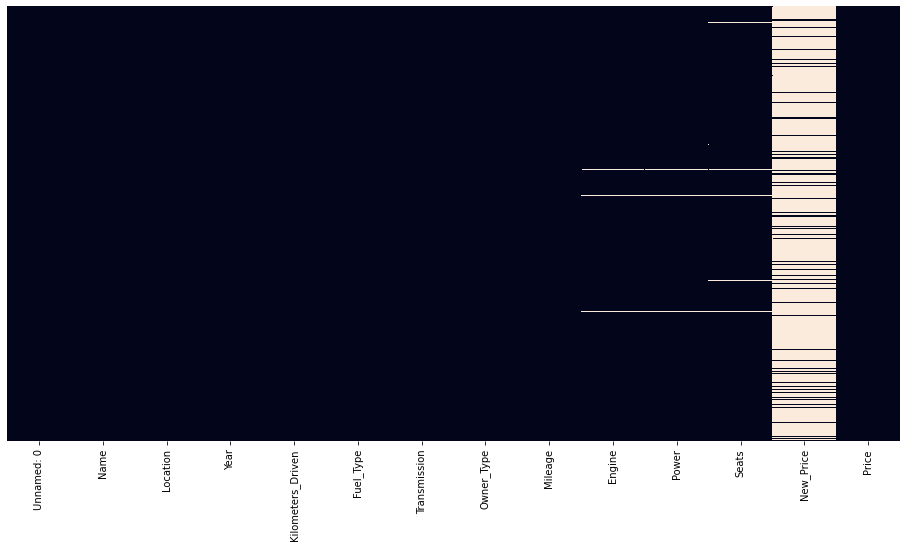

In [157]:
pli.figure(figsize=(16,8))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False) # ploting the heatmap 
# the white thin lines shows the null values

In [158]:
data.columns # gwtting the names of columns 

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

# problems in dataset

*   New_Price column contain many null values so it should be dropped 
*   we don't need Unnamed :0 column so dropping it 
*   Name, Location are string type values and it will not be convereted into integer data type as it contain many different values and string is not evaluated in Linear regerssion so dropping it
*   Some rows contain null values so dropping them
*   removing the subscript from the Power, Mileage ,Engine columns and then converting these row from object to integer or float datatype
*   Converting Automatic and manual Transmission to 0,1
*   Converting Fuel types to integer values(0,1,2,3,4)
*   Converting Owner types to integer value(0,1,2,3)






In [159]:
data.drop(['New_Price','Unnamed: 0','Name','Location'],axis=1,inplace=True)  #droping the columns that are not required

In [160]:
data.dropna(inplace=True) # dropping the rows which contains null values
data.isnull().sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [161]:
data=data[data["Power"].str.contains("null")==False]  # Some rows of Power columns contain null values which are contained as string so they are not dropped with the help of drop na as it drop only NAN

In [162]:
data.shape # new number of rows and columns after droping 

(5872, 10)

In [163]:
data.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


# **Data Visualization**



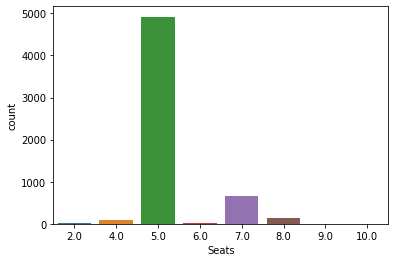

In [164]:
sns.countplot( data=data,x='Seats')

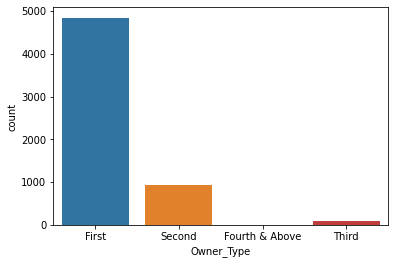

In [165]:
sns.countplot(x='Owner_Type',data=data)

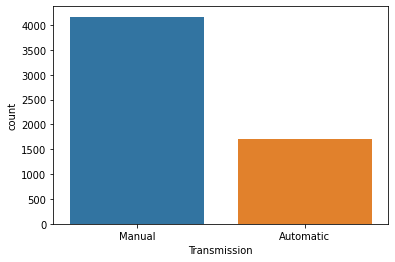

In [166]:
sns.countplot(x='Transmission',data=data)

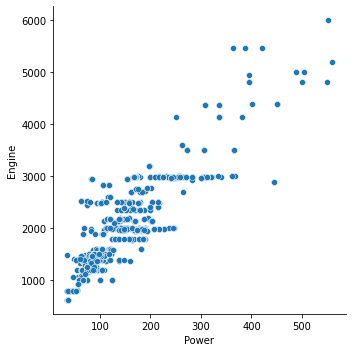

In [200]:
sns.relplot(x="Power", y="Engine", data=data)


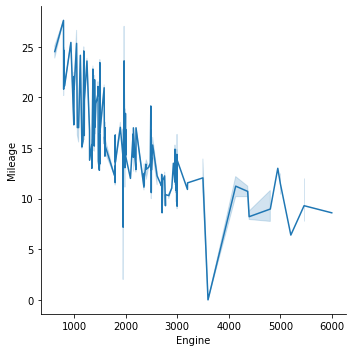

In [199]:
sns.relplot(x="Engine", y="Mileage", kind="line", data=data)

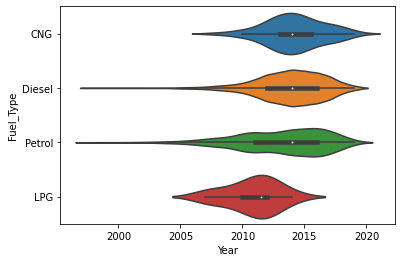

In [169]:
sns.violinplot(x="Year",y="Fuel_Type",data=data)

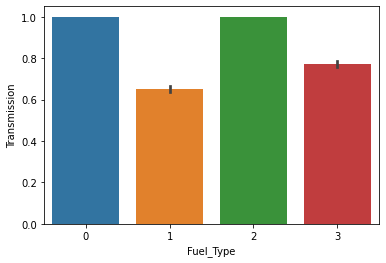

In [201]:
sns.barplot(x='Fuel_Type',y='Transmission',data=data)

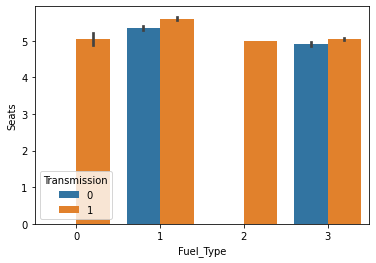

In [202]:
sns.barplot(x='Fuel_Type',y='Seats',hue='Transmission',data=data)

In [171]:
data['Transmission'].unique() # for converting the values of Transmission from object type  to integer type so counting number of unique values

array(['Manual', 'Automatic'], dtype=object)

In [172]:
transmissiontype=pd.get_dummies(data['Transmission'],drop_first=True) # Code for converting 
transmissiontype.head(3) # 1 for Manual and 0 for Automatic

,Manual
0,1
1,1
2,1


In [173]:
data['Transmission']=transmissiontype #storing back the converted values

<ipython-input-173-bc11127f12bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Transmission']=transmissiontype #storing back the converted values


In [174]:
data.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,1,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,2015,41000,Diesel,1,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2011,46000,Petrol,1,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,2012,87000,Diesel,1,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,2013,40670,Diesel,0,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [175]:
data['Fuel_Type'].unique() # printing number of unique values and then converting it to integer

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

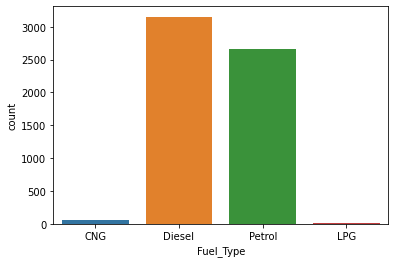

In [176]:
sns.countplot(x='Fuel_Type',data=data) # checking which type of fuel has more number of car

In [177]:
encoder=LabelEncoder() 

In [178]:
data['Fuel_Type']=encoder.fit_transform(data['Fuel_Type']) # IT CHANGES ALPHABETICALLY  
# 0 for CNG ,1 for Diesel , 2 for LPG and 3 for Petrol

<ipython-input-178-58ab63ef5223>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fuel_Type']=encoder.fit_transform(data['Fuel_Type']) # IT CHANGES ALPHABETICALLY


In [179]:
data['Owner_Type'].unique() #printing number of unique values and then converting it to integer

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [180]:
encoder=LabelEncoder() # it changes alphabatically
data['Owner_Type']=encoder.fit_transform(data['Owner_Type']) 
# 0 for First , 1 for Fourth & Above , 2 for Second and 3 for Third

<ipython-input-180-777df0a0918f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Owner_Type']=encoder.fit_transform(data['Owner_Type'])


In [181]:
data.head() # checking if above operations worked correctly or not

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,0,1,0,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,2015,41000,1,1,0,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2011,46000,3,1,0,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,2012,87000,1,1,0,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,2013,40670,1,0,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [182]:
data['Power']=data['Power'].str.replace('bhp','') # removing subscript of Power column

<ipython-input-182-85165993eec1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Power']=data['Power'].str.replace('bhp','') # removing subscript of Power column


In [183]:
data['Engine']=data['Engine'].str.replace('CC','') # removing subscript of Engine column

<ipython-input-183-e3a385566a55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Engine']=data['Engine'].str.replace('CC','') # removing subscript of Engine column


In [184]:
data['Mileage']=data['Mileage'].str.replace('kmpl','') # removing subsript(kmpl) of Mileage

<ipython-input-184-aab912e3988f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Mileage']=data['Mileage'].str.replace('kmpl','') # removing subsript(kmpl) of Mileage


In [185]:
data['Mileage']=data['Mileage'].str.replace('km/kg','')# removing subsript(km/kg) of Mileage

<ipython-input-185-96e9f833a0da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Mileage']=data['Mileage'].str.replace('km/kg','')# removing subsript(km/kg) of Mileage


In [186]:
data.head() # checking if it correctly worked or not

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,0,1,0,26.6,998,58.16,5.0,1.75
1,2015,41000,1,1,0,19.67,1582,126.2,5.0,12.50
2,2011,46000,3,1,0,18.2,1199,88.7,5.0,4.50
3,2012,87000,1,1,0,20.77,1248,88.76,7.0,6.00
4,2013,40670,1,0,2,15.2,1968,140.8,5.0,17.74


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5872 non-null   int64  
 1   Kilometers_Driven  5872 non-null   int64  
 2   Fuel_Type          5872 non-null   int64  
 3   Transmission       5872 non-null   uint8  
 4   Owner_Type         5872 non-null   int64  
 5   Mileage            5872 non-null   object 
 6   Engine             5872 non-null   object 
 7   Power              5872 non-null   object 
 8   Seats              5872 non-null   float64
 9   Price              5872 non-null   float64
dtypes: float64(2), int64(4), object(3), uint8(1)
memory usage: 593.5+ KB


In [188]:
data['Engine']=data['Engine'].astype(str).astype(int) # converting object datatype of Engine to integer

<ipython-input-188-54750b96f9f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Engine']=data['Engine'].astype(str).astype(int) # converting object datatype of Engine to integer


In [189]:
data['Power'] = pd.to_numeric(data['Power'])# converting object datatype of Power to float

<ipython-input-189-35eb29b6b476>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Power'] = pd.to_numeric(data['Power'])# converting object datatype of Power to float


In [190]:
data['Mileage']=pd.to_numeric(data['Mileage'])# converting object datatype of Mileage to float

<ipython-input-190-eb2778642fb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Mileage']=pd.to_numeric(data['Mileage'])# converting object datatype of Mileage to float


In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5872 non-null   int64  
 1   Kilometers_Driven  5872 non-null   int64  
 2   Fuel_Type          5872 non-null   int64  
 3   Transmission       5872 non-null   uint8  
 4   Owner_Type         5872 non-null   int64  
 5   Mileage            5872 non-null   float64
 6   Engine             5872 non-null   int64  
 7   Power              5872 non-null   float64
 8   Seats              5872 non-null   float64
 9   Price              5872 non-null   float64
dtypes: float64(4), int64(5), uint8(1)
memory usage: 593.5 KB


# Exploratory Data Analysis (EDA)

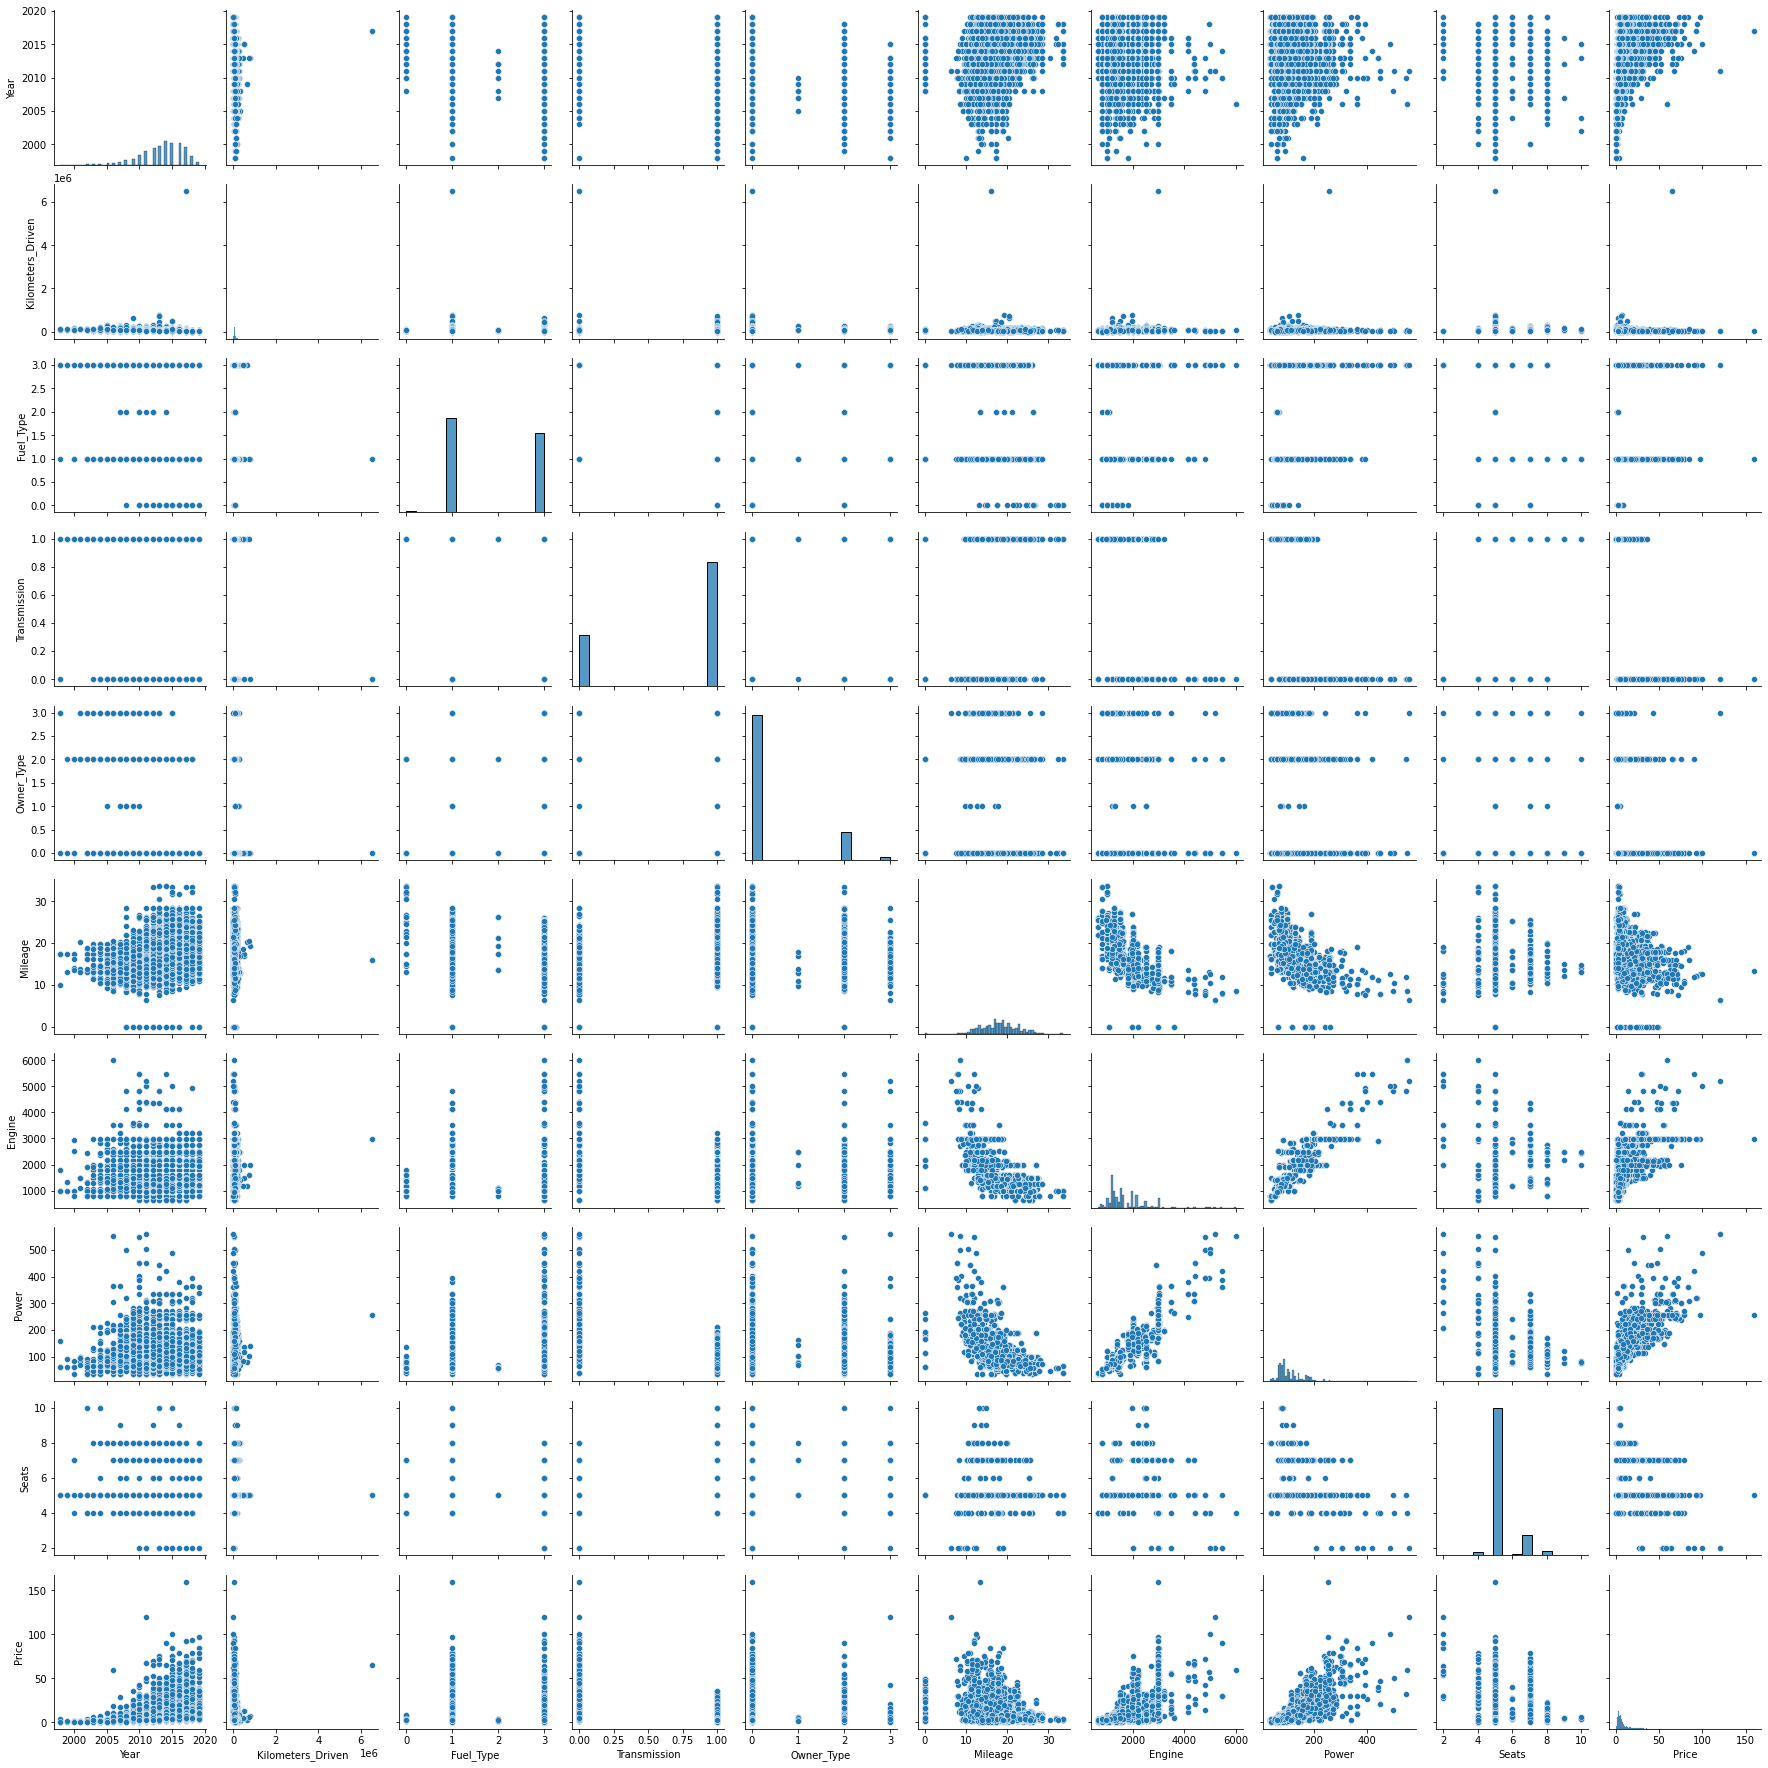

In [198]:
sns.pairplot(data)

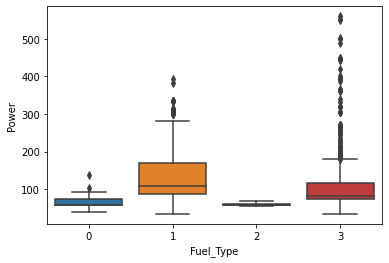

In [197]:
sns.boxplot(x='Fuel_Type',y='Power',data=data)

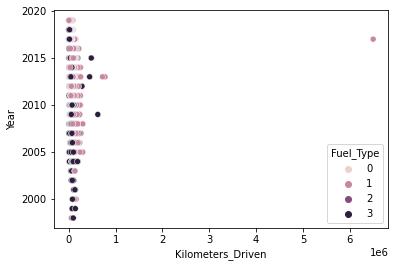

In [196]:
sns.scatterplot( x="Kilometers_Driven", y='Year', data=data, hue='Fuel_Type')
  

# Applying Regression Model

In [192]:
X=data.drop('Price',axis=1)
y=data['Price']

In [193]:
from sklearn.model_selection import train_test_split
X_train , X_test,y_train,y_test = train_test_split(X,y,random_state=1000,test_size=0.33)

In [194]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
regr = LinearRegression()
regr.fit(X_train, y_train)
y_test_prediction=regr.predict(X_test)

test_data_accuracy=accuracy_score(np.round(y_test_prediction),np.round(y_test))
print("Accuracy:",test_data_accuracy)

Accuracy: 0.1130030959752322


# Predicting the value of car

In [195]:
a=int(input("Year in yyyy format"))
b=int(input("	Kilometers_Driven"))
c=int(input("	Fuel_Type -0 for Cng ,1 for Diesel,2 for lpg and 3 for petrol"))
d=int(input("	Transmission - 0 for automatic and 1 for manual"))
e=int(input("	Owner_Type - 0 for first , 1 for fourth & above , 2 for second and 3 for third"))
f=float(input("	Mileage "))
g=int(input("	Engine"))
h=float(input("	Power"))
i=float(input("	Seats-2.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0"))

input_data=(a,b,c,d,e,f,g,h,i)
arr= np.asarray(input_data).reshape(1,-1)
prediction=regr.predict(arr)
print("The value of car in lakhs should be approx Rs ",prediction)

Year in yyyy format2013
	Kilometers_Driven40670
	Fuel_Type -0 for Cng ,1 for Diesel,2 for lpg and 3 for petrol1
	Transmission - 0 for automatic and 1 for manual1
	Owner_Type - 0 for first , 1 for fourth & above , 2 for second and 3 for third2
	Mileage 15.6
	Engine1968
	Power140.9
	Seats-2.0,4.0,5.0,6.0,7.0,8.0,9.0,10.05.0
The value of car in lakhs should be approx Rs  [13.9421783]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Thanks for reviewing my model
 any **suggestion**-